<h1 ><font color = 'green'> PUBG Game Prediction </font></h1>

### Table of Contents
- [Importing Libraries](#import)
- [Reading Data](#read)
- [Data Wrangling](#wrangling)
- [Feature Engineering](#feature) 
- [Model trainging (CatBoost Model)](#ml)

#### <font color='blue'>Importing Libraries</font><a class= 'anchor' id ='import'/>

In [1]:
#handling warnings
import warnings
warnings.filterwarnings("ignore")

#standard library
import pandas as pd
import numpy as np

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,6)

#scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#model
import catboost as cb

#model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### <font color='blue'>Reading the Data</font><a class= 'anchor' id ='read'/>

In [5]:
data = pd.read_csv('/kaggle/input/pubg-games-dataset/PUBG_Game_Prediction_data.csv')

#glimpse of the data
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [6]:
#data dimension
data.shape

(4446966, 29)

In [7]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

### Data Description

- <b>DBNOs</b> - Number of enemy players knocked.
- <b>assists</b> - Number of enemy players this player damaged that were killed by teammates.
- <b>boosts</b> - Number of boost items used.
- <b>damageDealt</b> - Total damage dealt. Note: Self inflicted damage is subtracted.
- <b>headshotKills</b> - Number of enemy players killed with headshots.
- <b>heals</b> - Number of healing items used.
- <b>Id</b> - Player’s Id
- <b>killPlace</b> - Ranking in match of number of enemy players killed.
- <b>killPoints</b> - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- <b>killStreaks</b> - Max number of enemy players killed in a short amount of time.
- <b>kills</b> - Number of enemy players killed.
- <b>longestKill</b> - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- <b>matchDuration</b> - Duration of match in seconds.
- <b>matchId</b> - ID to identify match. There are no matches that are in both the training and testing set.
- <b>matchType</b> - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- <b>rankPoints</b> - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
- <b>revives</b> - Number of times this player revived teammates.
- <b>rideDistance</b> - Total distance traveled in vehicles measured in meters.
- <b>roadKills</b> - Number of kills while in a vehicle.
- <b>swimDistance</b> - Total distance traveled by swimming measured in meters.
- <b>teamKills</b> - Number of times this player killed a teammate.
- <b>vehicleDestroys</b> - Number of vehicles destroyed.
- <b>walkDistance</b> - Total distance traveled on foot measured in meters.-
- <b>weaponsAcquired</b> - Number of weapons picked up.
- <b>winPoints</b> - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
- <b>groupId</b> - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- <b>numGroups</b> - Number of groups we have data for in the match.
- <b>maxPlace</b> - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- <b>winPlacePerc</b> - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

#### <font color='blue'>Data Wrangling</font><a class= 'anchor' id ='wrangling'/>

Check for any rows  with missing value of the target value

In [8]:
data[data['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [9]:
#remove the null value row
data.drop(2744604, axis=0, inplace= True)

In [10]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [11]:
#preparing new parameters to know how many players are there in particular match
data['players'] = data.groupby('matchId')['matchId'].transform('count')

In [12]:

data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,players
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


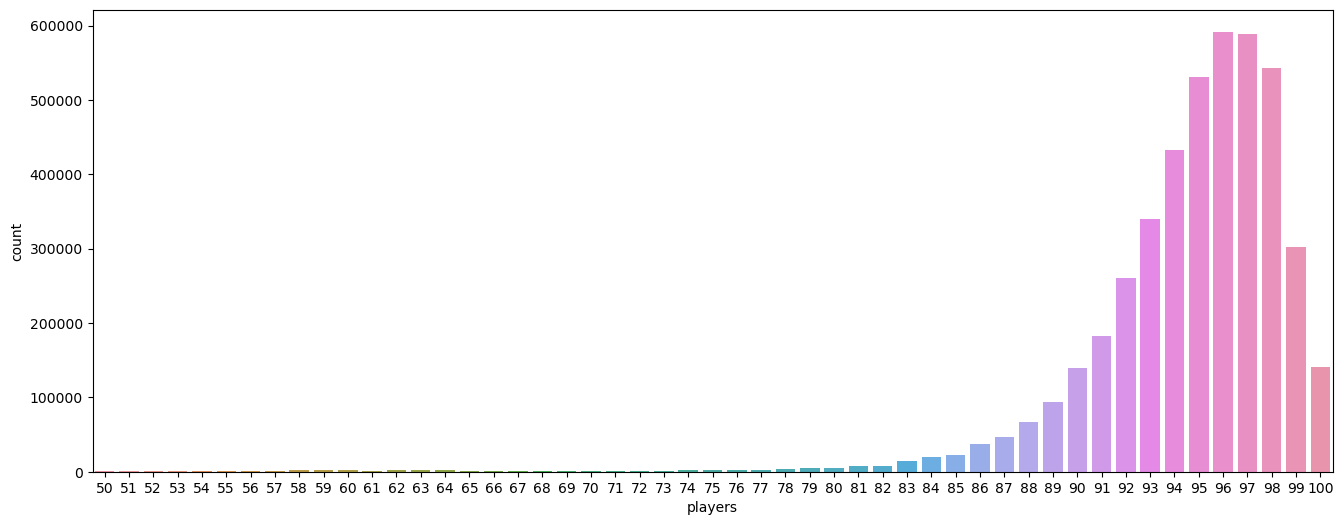

In [13]:
#no of matches with given number of players
sns.countplot(data = data[data['players']>=50],x='players')
plt.show()

The data for the players column is left skewd i.e not normally distributed

#### Data Analysis

Kills without moving?

In [14]:
#preparing dataset with respect to distance travel
data['totalDistance'] = data['rideDistance'] + data['swimDistance'] + data['walkDistance']

#anamoly detection
#person who has not moved still manage a kill
data['killWithoutMoving'] = ((data['kills'] > 0) & (data['totalDistance']==0))

In [15]:
data['killWithoutMoving']

0          False
1          False
2          False
3          False
4          False
           ...  
4446961    False
4446962    False
4446963    False
4446964    False
4446965    False
Name: killWithoutMoving, Length: 4446965, dtype: bool

In [16]:
data[data['killWithoutMoving'] == True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,players,totalDistance,killWithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


As we can see from the weaponsAcquired feature it makes no sense for a person to have so many weapon, if he has not moved in the distance and killed

In [17]:
#droping the table to make the data mor generalize
data.drop(data[data['killWithoutMoving']==True].index,inplace = True)

Extra-ordinary Road Kills!

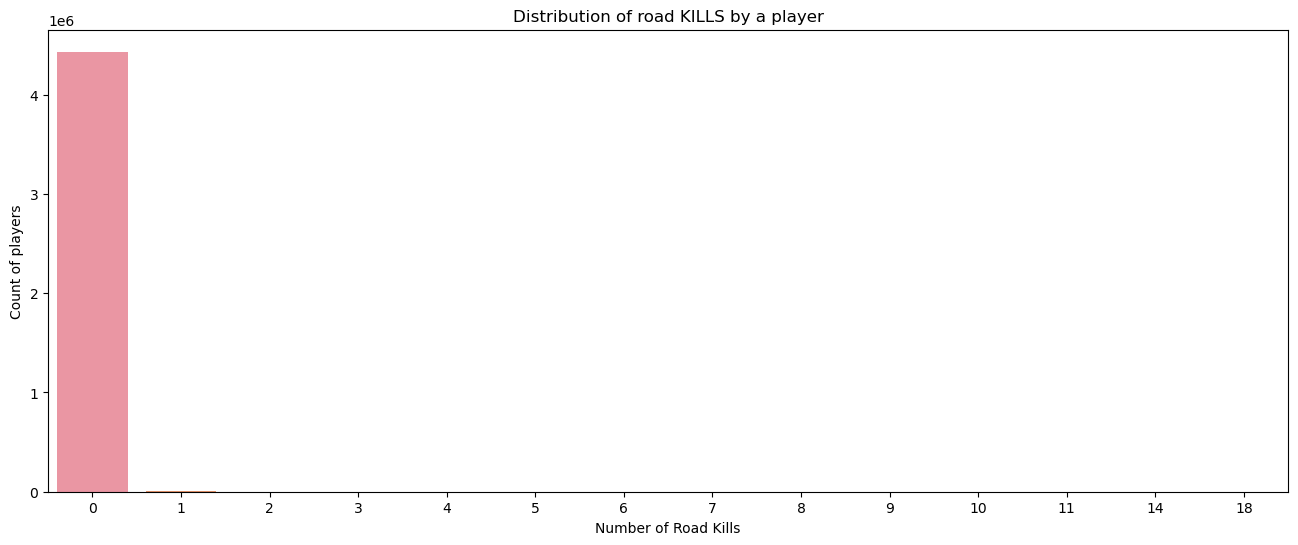

In [18]:
sns.countplot(data = data , x = data['roadKills']).set_title('Distribution of road KILLS by a player')
plt.xlabel('Number of Road Kills')
plt.ylabel('Count of players')
plt.show()

In [19]:
data[data['roadKills'] > 5].shape

(46, 32)

In [20]:
data.drop(data[data['roadKills'] > 5].index, inplace = True)

Extra-ordinary numbers of Kills!

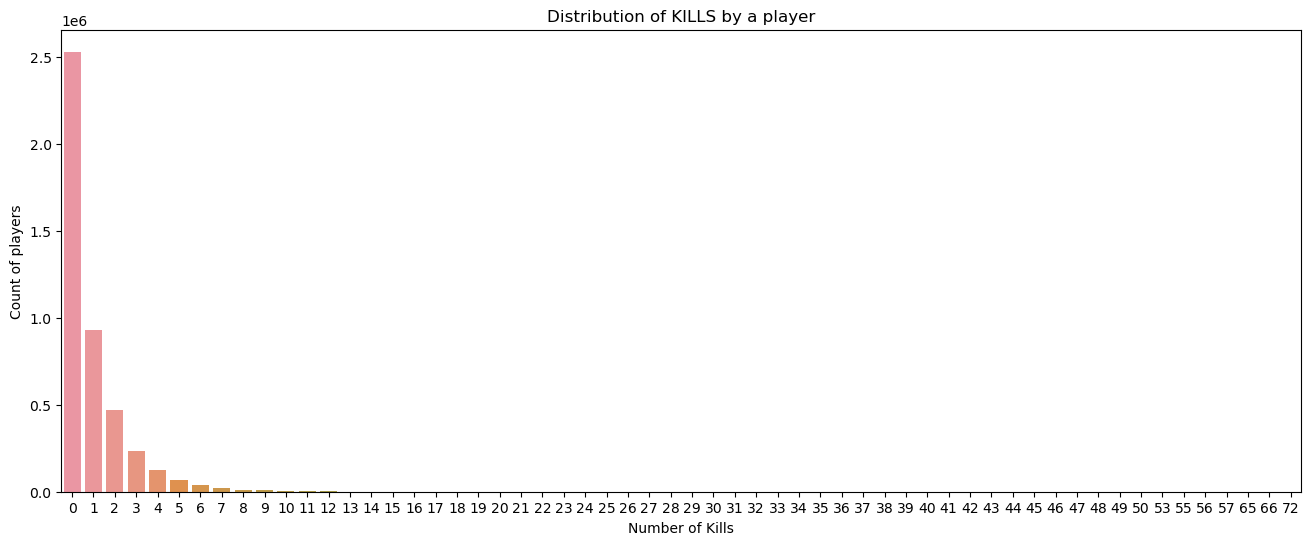

In [21]:
sns.countplot(data = data , x = data['kills']).set_title('Distribution of KILLS by a player')
plt.xlabel('Number of Kills')
plt.ylabel('Count of players')
plt.show()

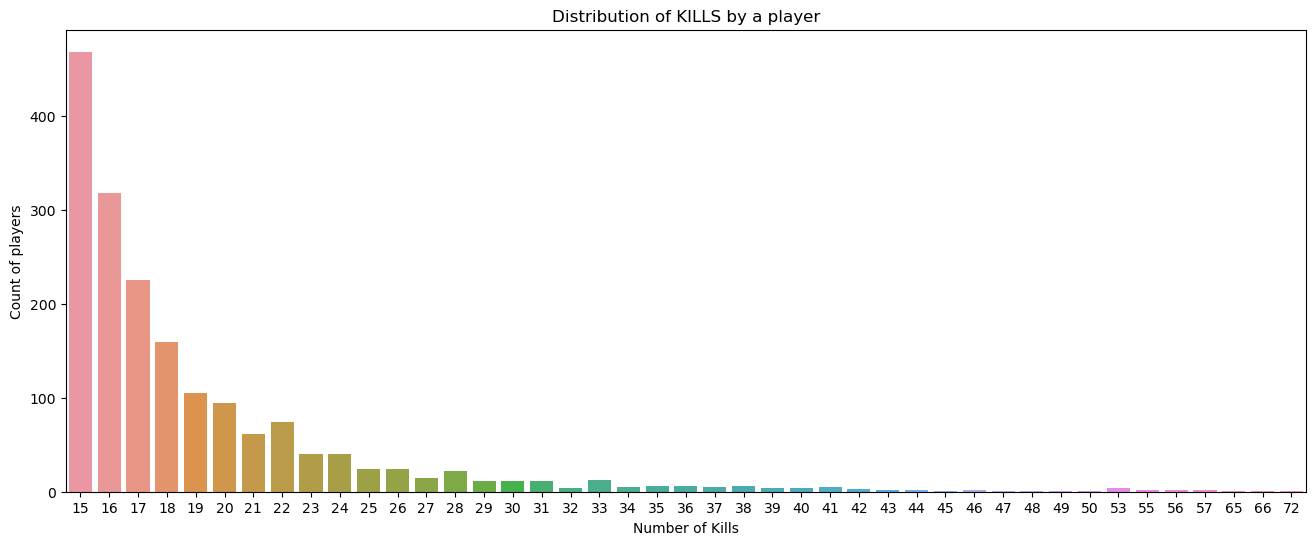

In [22]:
sns.countplot(data = data[data['kills']>=15] , x='kills').set_title('Distribution of KILLS by a player')

plt.xlabel('Number of Kills')
plt.ylabel('Count of players')
plt.show()

In [23]:
data[data['kills']>24].shape

(202, 32)

In [24]:
# drop the intances
data.drop(data[data['kills']>24].index,inplace=True)

Number of Headshot

In [25]:
#defining new feature to denote the amount if headshot in total kills done by a player
data['headshotRate'] = data['headshotKills']/data['kills']
data['headshotRate'] = data['headshotRate'].fillna(0)

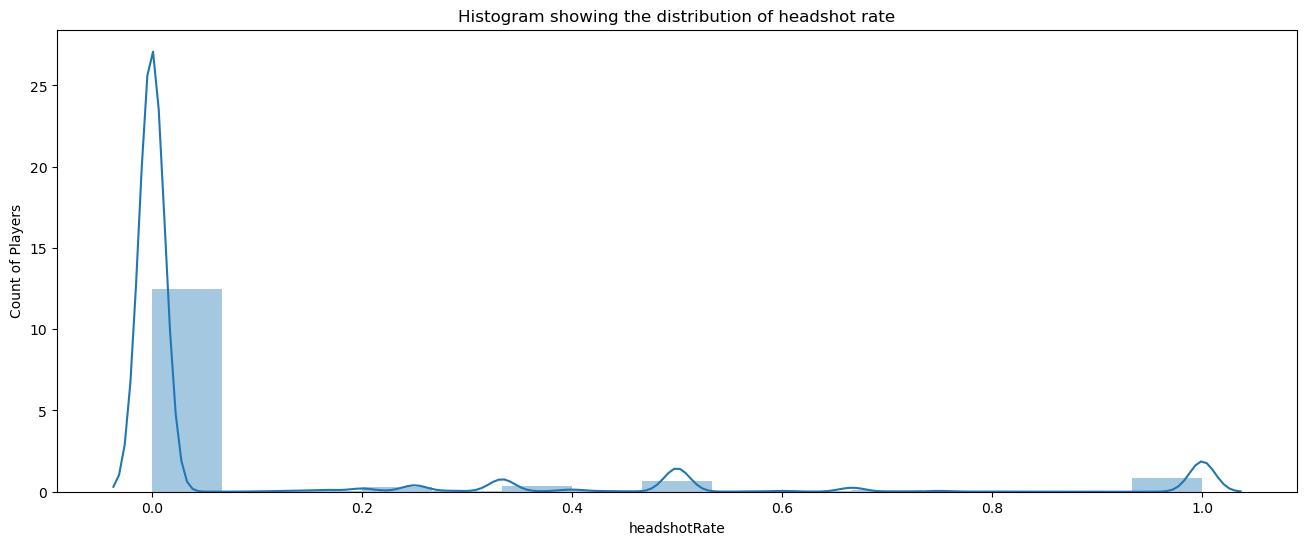

In [26]:
#plot the headshot rate distribution

sns.distplot(data['headshotRate'],bins = 15).set_title('Histogram showing the distribution of headshot rate')
plt.ylabel('Count of Players')
plt.show()

In [27]:
#removing all the data where numbers of kills is greater than 5 and all are headshots
data[(data['headshotRate'] == 1) & (data['kills'] > 5)].shape

(187, 33)

In [28]:
data.drop(data[(data['headshotRate'] == 1) & (data['kills'] > 5)].index, inplace = True)
data.shape

(4444995, 33)

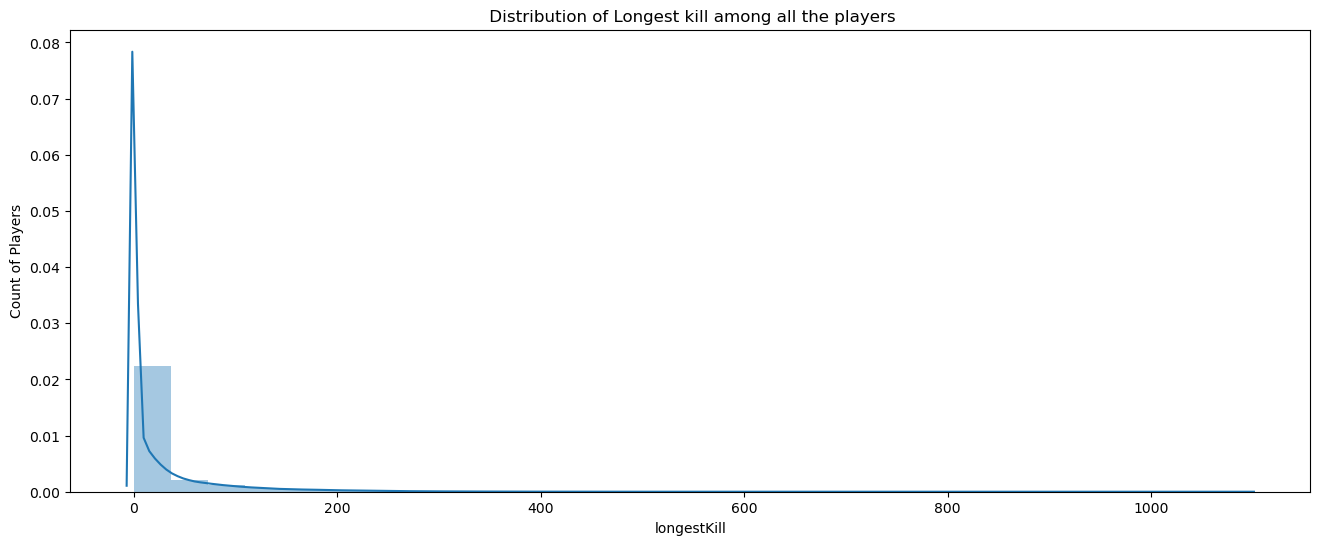

In [29]:
sns.distplot(data['longestKill'],bins = 30).set_title(" Distribution of Longest kill among all the players")
plt.ylabel('Count of Players')
plt.show()

In [30]:
data[data['longestKill'] >= 500].shape

(1752, 33)

In [31]:
#removing the data where the longestKill is above 500
data.drop(data[data['longestKill'] >= 500].index, inplace = True)

Weapon Change

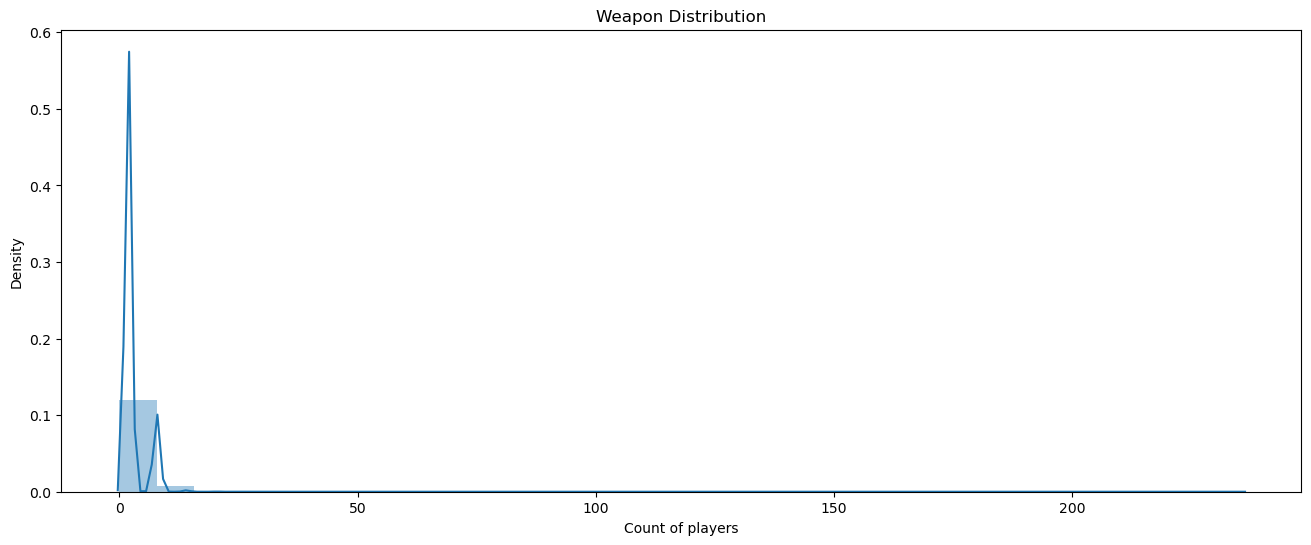

In [32]:
sns.distplot(data['weaponsAcquired'],bins=30).set_title('Weapon Distribution')
plt.xlabel('Count of players')
plt.show()

In [33]:
data[data['weaponsAcquired'] > 15].shape

(5583, 33)

In [34]:
data.drop(data[data['weaponsAcquired'] > 15].index,inplace = True)

#### EDA

In [35]:
data.shape

(4437660, 33)

<Axes: >

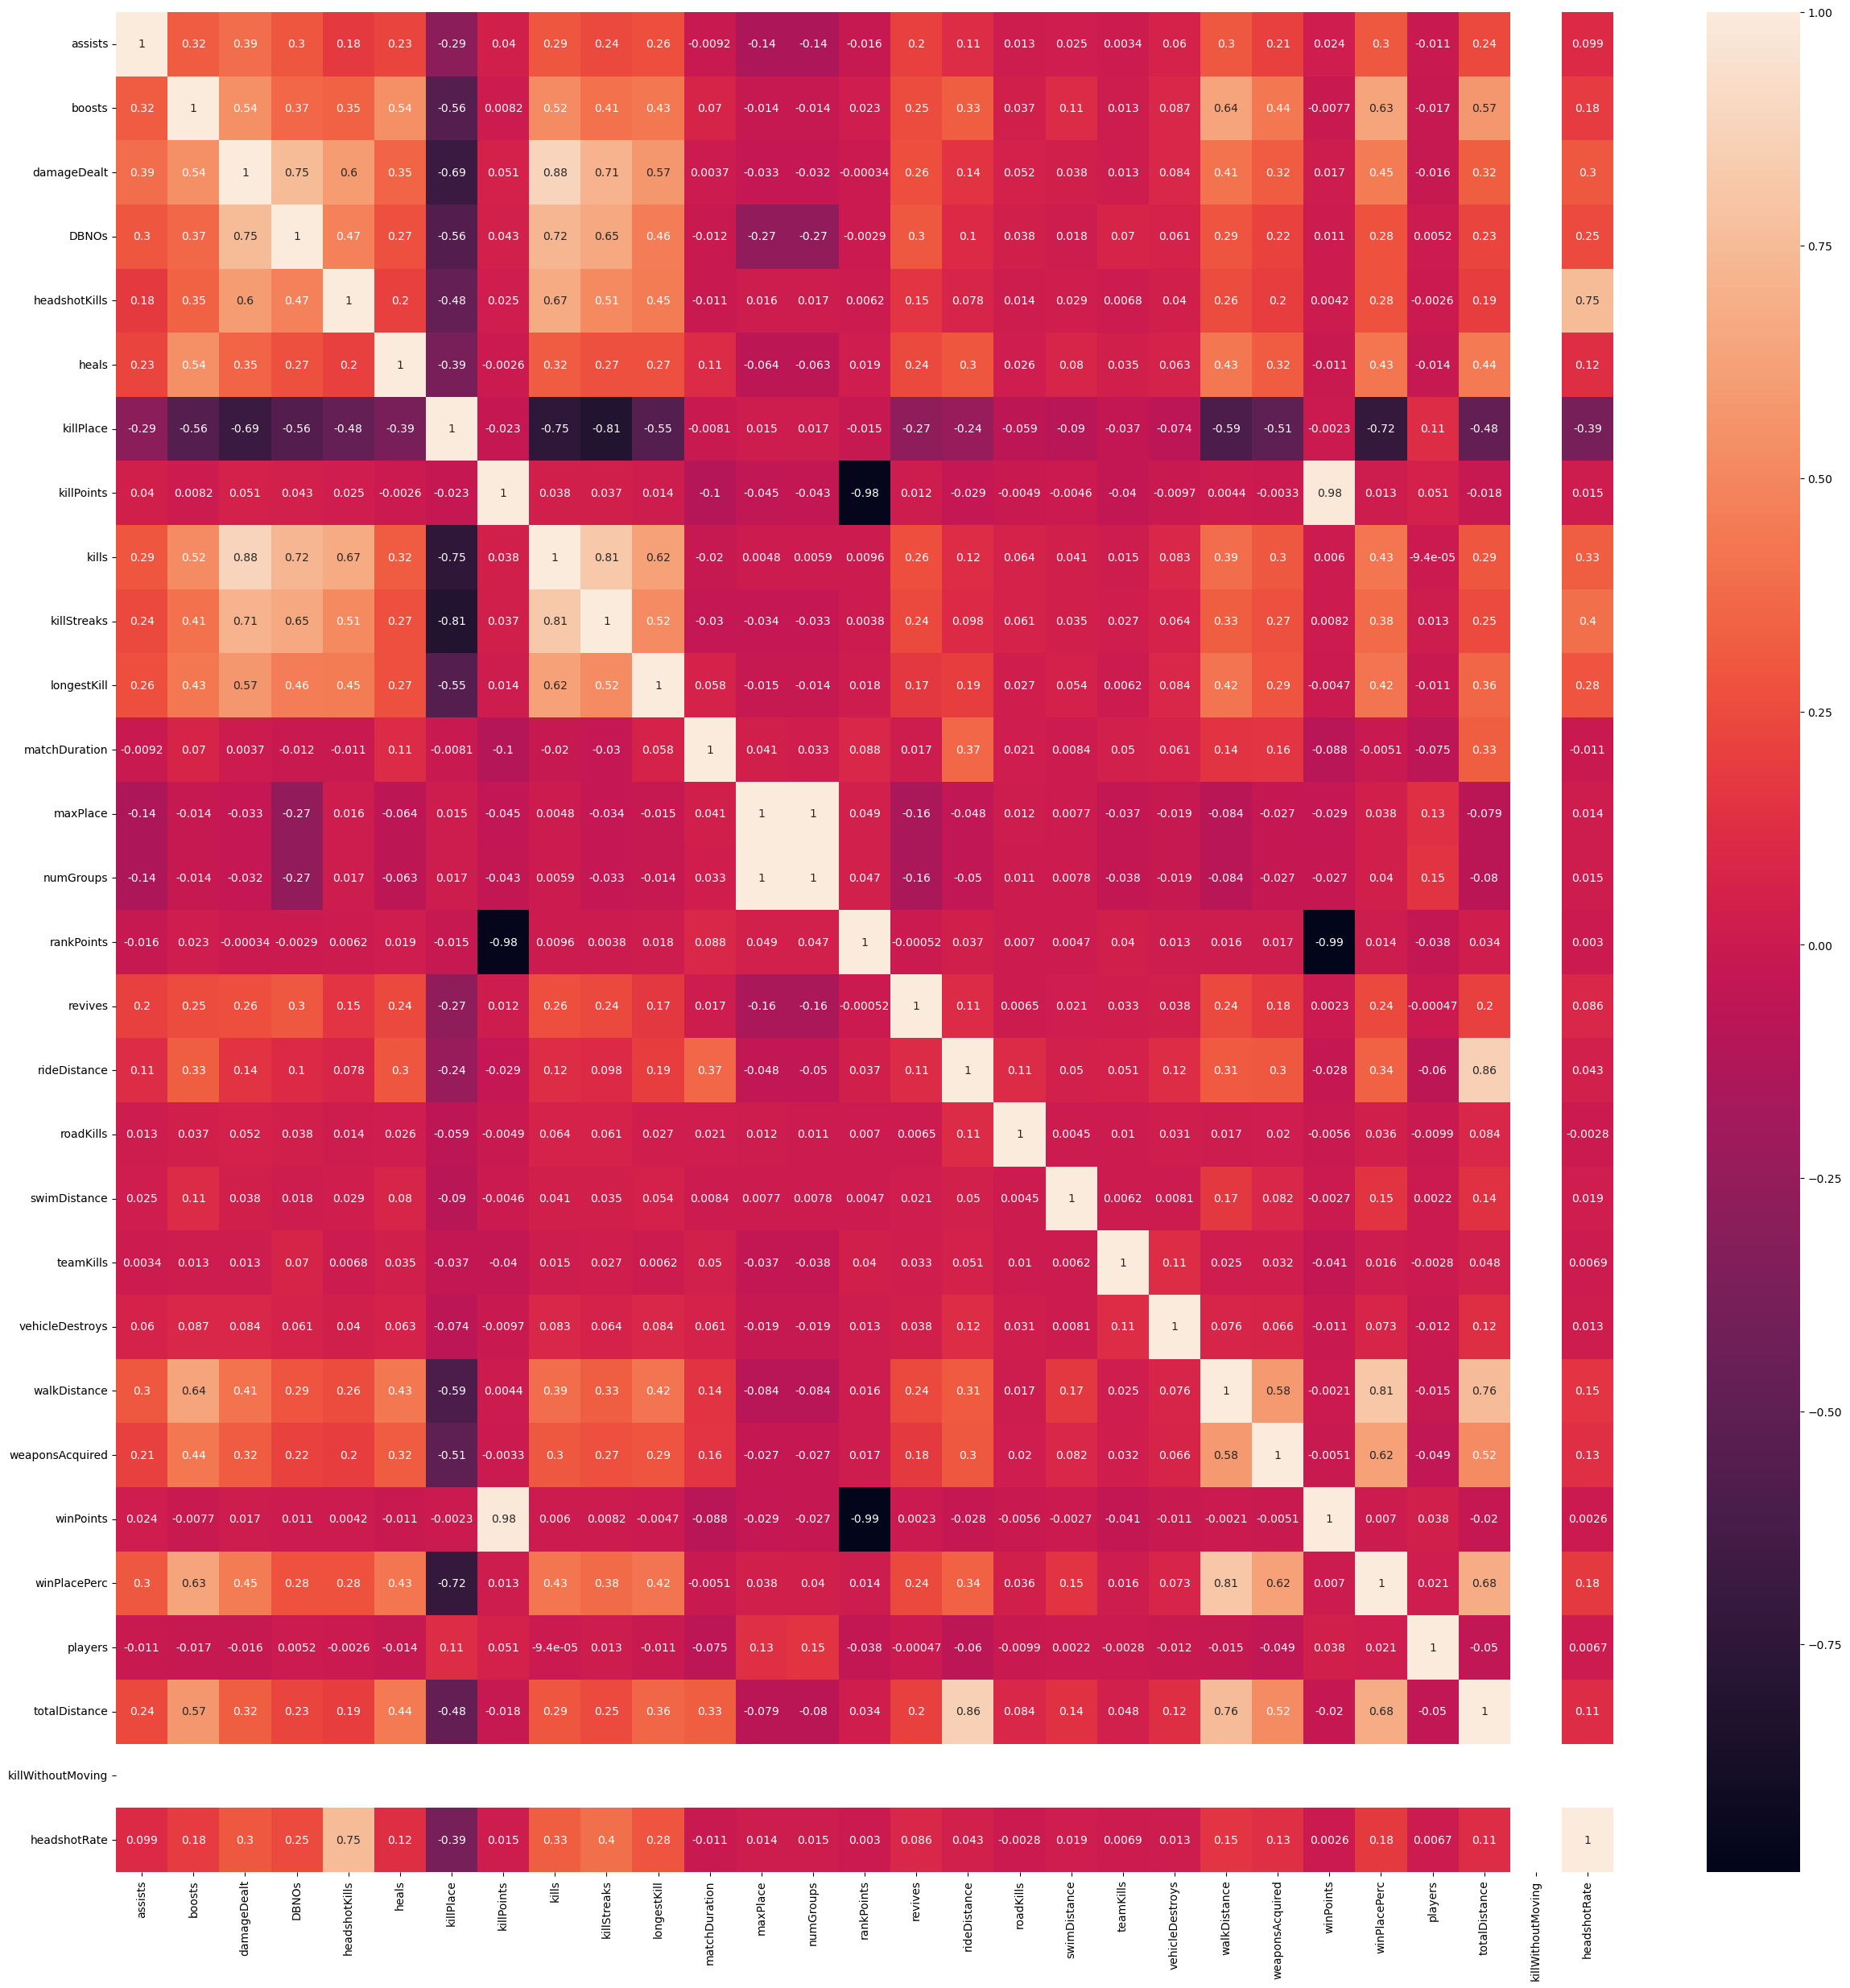

In [36]:
#plotting correaraltion matrix
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True)

### <font color="blue"> Feature Engineering</font><a class='anchor' id ='feature'>

In [37]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'players',
       'totalDistance', 'killWithoutMoving', 'headshotRate'],
      dtype='object')

In [38]:
#normalizing features with factor
#giving more wieghtage to match where the number of players is more
norm_factor = (100 - data['players']/100)+1
norm_factor

0          100.04
1          100.09
2          100.02
3          100.09
4          100.03
            ...  
4446961    100.06
4446962    100.07
4446963    100.02
4446964    100.06
4446965    100.02
Name: players, Length: 4437660, dtype: float64

In [39]:
data['killsNorm'] = data['kills'] * norm_factor
data['damageDealtNorm'] = data['damageDealt'] * norm_factor
data['maxPlaceNorm'] = data['maxPlace'] * norm_factor
data['matchDurationNorm'] = data['matchDuration'] * norm_factor

#merging unecessary columns
data["healsNboost"] = data['heals'] + data['boosts']
data['assist'] = data['assists'] + data['revives']

In [40]:
#creating new dataFrame with required columns
df = data.drop(columns=['Id', 'groupId', 'matchId', 'assists', 'boosts',
                        'heals','kills','matchDuration','maxPlace',
                        'revives', 'rideDistance','swimDistance',
                        'walkDistance','killWithoutMoving','damageDealt'],axis=1)

In [41]:
df.shape

(4437660, 24)

### <font color = 'blue'>ML Catboost Model</font><a class='anchor' id='ml'/>

In [42]:
X = df.drop(columns=['winPlacePerc'], axis=1)
y= df['winPlacePerc']

In [43]:

X = pd.get_dummies(X,columns=['matchType'])

In [44]:
features = X.columns
X.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,60,1241,0,0.00,26,-1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,57,0,0,0.00,25,1484,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,47,0,0,0.00,47,1491,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,75,0,0,0.00,30,1408,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,45,0,1,58.53,95,1560,0,0,...,0,0,0,0,0,0,0,1,0,0


### Scaling Data

In [45]:
sc = StandardScaler()
X_std= sc.fit_transform(X)

In [46]:
X= pd.DataFrame(X_std)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-0.582471,-0.383827,0.449558,1.172547,-0.765139,-0.459684,-0.732752,-1.212396,-0.049578,-0.142463,...,-0.005697,-0.033649,-0.005536,-0.013939,-0.008439,-0.054838,-0.206548,-0.370781,-0.40507,1.236297
1,-0.582471,-0.383827,0.340267,-0.804723,-0.765139,-0.459684,-0.775723,0.803561,-0.049578,-0.142463,...,-0.005697,-0.033649,-0.005536,-0.013939,-0.008439,-0.054838,-0.206548,-0.370781,-0.40507,1.236297
2,-0.582471,-0.383827,-0.024035,-0.804723,-0.765139,-0.459684,0.169637,0.813064,-0.049578,-0.142463,...,-0.005697,-0.033649,-0.005536,-0.013939,-0.008439,-0.054838,-0.206548,-0.370781,-0.40507,-0.808867
3,-0.582471,-0.383827,0.996011,-0.804723,-0.765139,-0.459684,-0.560868,0.700387,-0.049578,-0.142463,...,-0.005697,-0.033649,-0.005536,-0.013939,-0.008439,-0.054838,-0.206548,-0.370781,-0.40507,1.236297
4,-0.582471,-0.383827,-0.096895,-0.804723,0.647411,0.727070,2.232241,0.906734,-0.049578,-0.142463,...,-0.005697,-0.033649,-0.005536,-0.013939,-0.008439,-0.054838,-0.206548,2.697009,-0.40507,-0.808867


#### Train and Test Split

In [47]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [48]:
X_train.shape , X_test.shape

((2973232, 38), (1464428, 38))

In [49]:
import catboost as cb

In [50]:
train_dataset = cb.Pool(X_train,y_train)
test_dataset = cb.Pool(X_test,y_test)


In [51]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [52]:
#Grid Search

grid = {'iterations': [100, 150], 
       'learning_rate': [0.03, 0.1], 
       'depth': [2, 4, 6, 8]}

model.grid_search(grid, train_dataset)

0:	learn: 0.5483381	test: 0.5484986	best: 0.5484986 (0)	total: 352ms	remaining: 34.9s
1:	learn: 0.5334820	test: 0.5336402	best: 0.5336402 (1)	total: 572ms	remaining: 28s
2:	learn: 0.5191070	test: 0.5192658	best: 0.5192658 (2)	total: 793ms	remaining: 25.6s
3:	learn: 0.5051973	test: 0.5053582	best: 0.5053582 (3)	total: 1.02s	remaining: 24.6s
4:	learn: 0.4917098	test: 0.4918696	best: 0.4918696 (4)	total: 1.3s	remaining: 24.6s
5:	learn: 0.4786661	test: 0.4788283	best: 0.4788283 (5)	total: 1.5s	remaining: 23.6s
6:	learn: 0.4660448	test: 0.4662057	best: 0.4662057 (6)	total: 1.72s	remaining: 22.9s
7:	learn: 0.4538557	test: 0.4540150	best: 0.4540150 (7)	total: 1.94s	remaining: 22.3s
8:	learn: 0.4420681	test: 0.4422261	best: 0.4422261 (8)	total: 2.15s	remaining: 21.7s
9:	learn: 0.4306728	test: 0.4308306	best: 0.4308306 (9)	total: 2.37s	remaining: 21.3s
10:	learn: 0.4196447	test: 0.4198038	best: 0.4198038 (10)	total: 2.58s	remaining: 20.9s
11:	learn: 0.4089978	test: 0.4091550	best: 0.4091550 (11

{'params': {'depth': 8, 'iterations': 150, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [53]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = features
feature_importance_df['importance'] = model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by=['importance'],ascending=False)

In [54]:
feature_importance_df
important_feature = feature_importance_df[feature_importance_df['importance'] >= 0.05]['features']

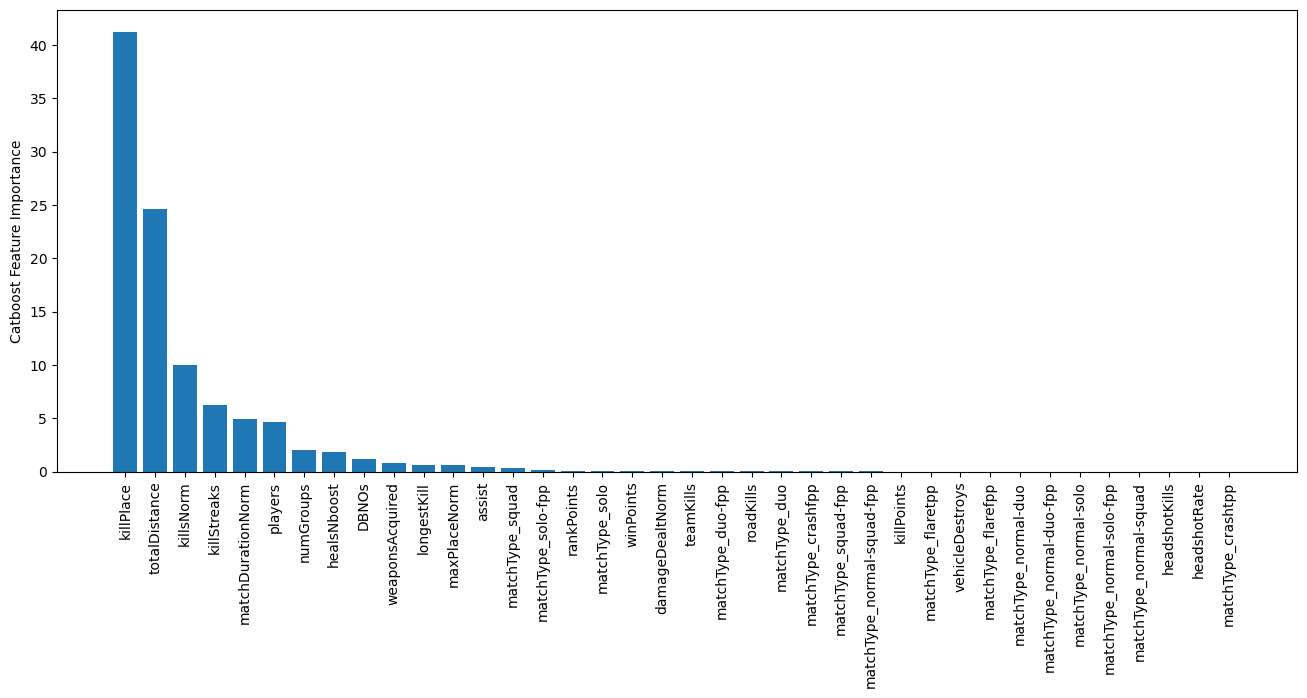

In [55]:
plt.bar(feature_importance_df.features,feature_importance_df.importance)
plt.ylabel('Catboost Feature Importance')
plt.xticks(rotation = 90)
plt.show()

## Prediction based on above data features

In [56]:
pred = model.predict(X_test)

In [57]:
#how much percent times the model predicts wrongly
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2= r2_score(y_test,pred)

# Testing performance

print('RSME: {:.2f}'.format(rmse))
print("R2: {:.2f}".format(r2))

RSME: 0.08
R2: 0.93


#### Removing unecessary features

In [68]:
unimportant_feature = feature_importance_df[feature_importance_df['importance'] < 0.05]['features']
unimportant_feature

9                      teamKills
25             matchType_duo-fpp
8                      roadKills
24                 matchType_duo
22            matchType_crashfpp
37           matchType_squad-fpp
33    matchType_normal-squad-fpp
3                     killPoints
27            matchType_flaretpp
10               vehicleDestroys
26            matchType_flarefpp
28          matchType_normal-duo
29      matchType_normal-duo-fpp
30         matchType_normal-solo
31     matchType_normal-solo-fpp
32        matchType_normal-squad
1                  headshotKills
15                  headshotRate
23            matchType_crashtpp
Name: features, dtype: object

In [69]:
X_clean = df.drop(columns=['teamKills','roadKills','matchType','killPoints','headshotKills','headshotRate','winPlacePerc'],axis=1)
 

In [70]:
X_clean.shape

(4437660, 17)

In [71]:
features_set1 = X_clean.columns

#applying standard scaler
sc= StandardScaler()
X_clean = pd.DataFrame(sc.fit_transform(X_clean))

#Train-test-split
X_train1, X_test1,y_train1,y_test1 = train_test_split(X_clean,y,test_size=0.2,random_state=0)

#catboost model

train_dataset1 = cb.Pool(X_train1,y_train1)
test_dataset1 = cb.Pool(X_test1,y_test1) 

model1 = cb.CatBoostRegressor(loss_function='RMSE')




In [74]:
#Grid Search

grid1 = {'iterations': [100, 150], 
       'learning_rate': [0.03,0.1], 
       'depth': [2,6, 8]}

model1.grid_search(grid1 , train_dataset1)


0:	learn: 0.5484364	test: 0.5482065	best: 0.5482065 (0)	total: 259ms	remaining: 25.6s
1:	learn: 0.5335746	test: 0.5333484	best: 0.5333484 (1)	total: 495ms	remaining: 24.3s
2:	learn: 0.5191854	test: 0.5189662	best: 0.5189662 (2)	total: 750ms	remaining: 24.3s
3:	learn: 0.5052726	test: 0.5050573	best: 0.5050573 (3)	total: 989ms	remaining: 23.7s
4:	learn: 0.4918217	test: 0.4916126	best: 0.4916126 (4)	total: 1.23s	remaining: 23.3s
5:	learn: 0.4787851	test: 0.4785815	best: 0.4785815 (5)	total: 1.46s	remaining: 22.9s
6:	learn: 0.4661642	test: 0.4659653	best: 0.4659653 (6)	total: 1.7s	remaining: 22.6s
7:	learn: 0.4539420	test: 0.4537469	best: 0.4537469 (7)	total: 1.93s	remaining: 22.2s
8:	learn: 0.4421334	test: 0.4419418	best: 0.4419418 (8)	total: 2.17s	remaining: 21.9s
9:	learn: 0.4307312	test: 0.4305432	best: 0.4305432 (9)	total: 2.4s	remaining: 21.6s
10:	learn: 0.4196429	test: 0.4194580	best: 0.4194580 (10)	total: 2.64s	remaining: 21.4s
11:	learn: 0.4089410	test: 0.4087605	best: 0.4087605 (

{'params': {'depth': 8, 'iterations': 150, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [75]:
model1.feature_importances_


array([1.23896911e+00, 4.00619282e+01, 7.49364881e+00, 1.30128829e+00,
       2.57670337e+00, 1.20051567e-01, 2.27065085e-03, 7.75176538e-01,
       7.15530059e-02, 4.77022871e+00, 2.55048722e+01, 8.11252542e+00,
       6.97046781e-02, 3.57833908e-01, 5.19422679e+00, 1.90822302e+00,
       4.40795708e-01])

In [76]:
#feature importance
feature_importance_df1 = pd.DataFrame()
feature_importance_df1['features'] = features_set1
feature_importance_df1['importance'] = model1.feature_importances_

feature_importance_df1 = feature_importance_df1.sort_values(by=['importance'],ascending=False)


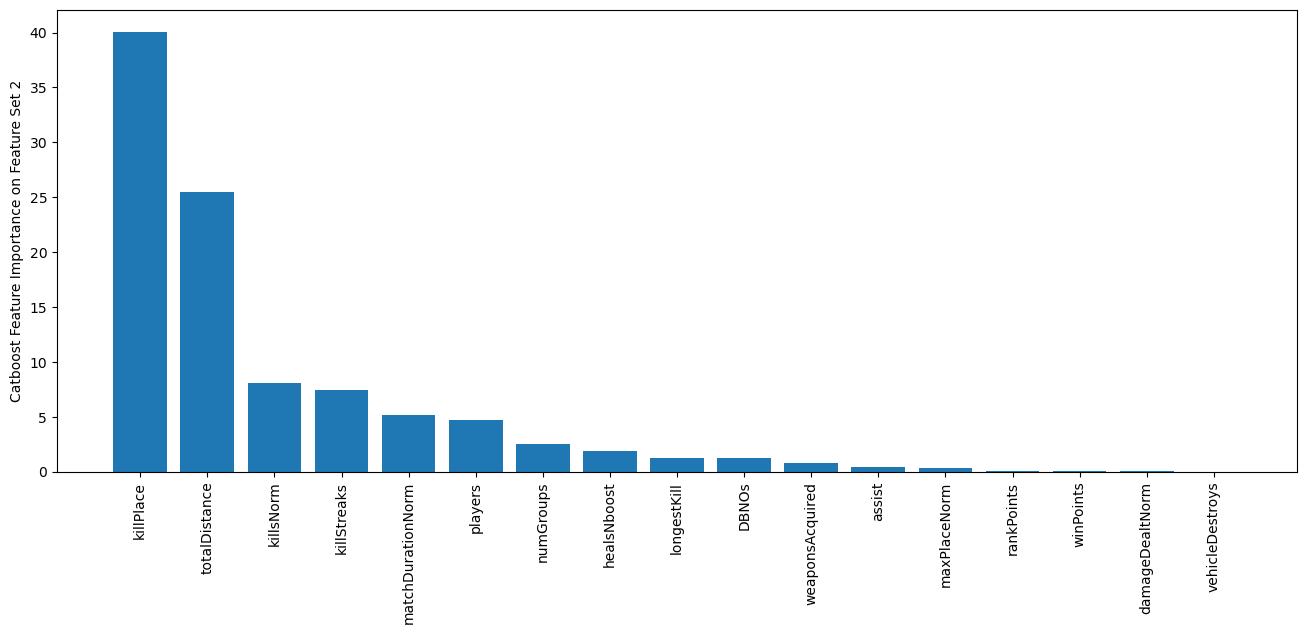

In [77]:
plt.bar(feature_importance_df1.features,feature_importance_df1.importance)
plt.ylabel('Catboost Feature Importance on Feature Set 2')
plt.xticks(rotation = 90)
plt.show()

### Prediction of model on new Features set


In [78]:
pred1 = model1.predict(X_test1)

In [79]:
#how much percent times the model predicts wrongly
rmse_1 = np.sqrt(mean_squared_error(y_test1,pred1))
r2_1= r2_score(y_test1,pred1)

# Testing performance

print('RSME for new feature set : {:.2f}'.format(rmse_1))
print("R2 for new feature set: {:.2f}".format(r2_1))

RSME for new feature set : 0.08
R2 for new feature set: 0.93
